<a href="https://colab.research.google.com/github/AnishaA-git/Heart_Disease/blob/master/Fractal_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Fractal Clustering**

**Objective Functions**:

Different type of Cluster details and the golden cluster in Age and Cholesterol:
1. Border line for Cholesterol level for a person to encounter Heart Disease.
2. High Risk range of Cholesterol for Heart disease.

Different type of Cluster details and the golden cluster in Age and Resting blood Pressure:
1. Border line for Blood Pressure level for a person to encounter Heart Disease.
2. Risk range of Blood Pressure level for Heart disease.
3. High Risk range of Blood Pressure level for Heart disease.

Different type of Cluster details and the golden cluster in Age and Heart Beat:
1. Low Heart Beat range which can lead to Heart Disease ventually.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn import metrics
from matplotlib import pyplot as plt
from past.builtins import xrange
from itertools import cycle, islice
from datetime import datetime
import scipy.cluster.hierarchy as shc
from sklearn.preprocessing import StandardScaler
from pandas.plotting import parallel_coordinates


import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

## Creating a Pandas DataFrame from a CSV file

In [2]:
filename = "https://raw.githubusercontent.com/AnishaA-git/Heart_Disease/master/heart.csv"
df = pd.read_csv(filename, sep=',', nrows=304)
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


## **Data Wrangling**

In [3]:
df = df.rename(columns={"age": "Age", "sex": "Sex","cp": "ChestPain", "trestbps": "Resting_BP", "fbs": "FBS", "restecg": "Rest_ECG", "exang": "Exer_Angina",
                   "slope": "Slope","ca": "CA","thal": "Thal", "target": "Heart_Disease","chol": "Cholesterol", "thalach": "Max_HB", "oldpeak": "ST_Depresn"})
df

,Age,Sex,ChestPain,Resting_BP,Cholesterol,FBS,Rest_ECG,Max_HB,Exer_Angina,ST_Depresn,Slope,CA,Thal,Heart_Disease
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [4]:
# Checking to see if there are any duplicated data in dataset
df[df.duplicated() == True]

,Age,Sex,ChestPain,Resting_BP,Cholesterol,FBS,Rest_ECG,Max_HB,Exer_Angina,ST_Depresn,Slope,CA,Thal,Heart_Disease
164,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1


In [5]:
# Removing duplicate data
df.drop_duplicates(inplace=True)

df.shape

(302, 14)

## Data Sampling and Data Decscription

## Data Columns

In [6]:
df.columns

Index(['Age', 'Sex', 'ChestPain', 'Resting_BP', 'Cholesterol', 'FBS',
       'Rest_ECG', 'Max_HB', 'Exer_Angina', 'ST_Depresn', 'Slope', 'CA',
       'Thal', 'Heart_Disease'],
      dtype='object')

In [7]:
df.head()

,Age,Sex,ChestPain,Resting_BP,Cholesterol,FBS,Rest_ECG,Max_HB,Exer_Angina,ST_Depresn,Slope,CA,Thal,Heart_Disease
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [8]:
# Checking to see if there are any null values in our dataset.
df.isnull().any()

Age              False
Sex              False
ChestPain        False
Resting_BP       False
Cholesterol      False
FBS              False
Rest_ECG         False
Max_HB           False
Exer_Angina      False
ST_Depresn       False
Slope            False
CA               False
Thal             False
Heart_Disease    False
dtype: bool

## Statistics

In [9]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Age,302.0,54.420530,9.047970,29.0,48.00,55.5,61.00,77.0
Sex,302.0,0.682119,0.466426,0.0,0.00,1.0,1.00,1.0
ChestPain,302.0,0.963576,1.032044,0.0,0.00,1.0,2.00,3.0
Resting_BP,302.0,131.602649,17.563394,94.0,120.00,130.0,140.00,200.0
Cholesterol,302.0,246.500000,51.753489,126.0,211.00,240.5,274.75,564.0
FBS,302.0,0.149007,0.356686,0.0,0.00,0.0,0.00,1.0
Rest_ECG,302.0,0.526490,0.526027,0.0,0.00,1.0,1.00,2.0
Max_HB,302.0,149.569536,22.903527,71.0,133.25,152.5,166.00,202.0
Exer_Angina,302.0,0.327815,0.470196,0.0,0.00,0.0,1.00,1.0
ST_Depresn,302.0,1.043046,1.161452,0.0,0.00,0.8,1.60,6.2


# Key Insights

- Total data instances: 302
- Mean age for both male and female: 54.42
- Minimum age (below this age people are not included in this case study): 29
- Maximum age (above this age people are not included in this case study): 77
- Range of chestpain: 0->3
- Range of resting blood pressure: 94->200
- Range of Cholesterol: 126.0->564.0
- Fasting Blood Sugar(FBS): 0 or 1
- Range of Resting ECG: 0->2
- Range of Maximum Heart Beat(Max_HB): 71->202


## SSE and Silhouette score Method for calculating Clusters

In [10]:
def sse_and_silhouette_score(best_cols,best_vals):  
  # best_cols=[col1.name,col2.name]
  # best_vals = df[best_cols].iloc[ :, [0,1]].values
  sse_within_cluster = {}
  silhouette_score = {}
  max_loop=25
  for k in range(2, max_loop):
    kmeans = KMeans(n_clusters=k,  random_state=10, n_init=10, n_jobs=-1)
    kmeans.fit(best_vals)
    sse_within_cluster[k] = kmeans.inertia_
    silhouette_score[k] = metrics.silhouette_score(best_vals, kmeans.labels_, random_state=10)

  _ = plt.figure(figsize=(10,6))
  ax1 = plt.subplot(211)
  _ = plt.plot(list(sse_within_cluster.keys()), list(sse_within_cluster.values()))
  _ = plt.xlabel("Number of Clusters")
  _ = plt.ylabel("SSE Within Cluster")
  _ = plt.title("Within Cluster SSE After K-Means Clustering")
  _ = plt.xticks([i for i in range(2, max_loop)], rotation=75)

  ax2 = plt.subplot(212)
  _ = plt.plot(list(silhouette_score.keys()), list(silhouette_score.values()))
  _ = plt.xlabel("Number of Clusters")
  _ = plt.ylabel("Silhouette Score")
  _ = plt.title("Silhouette Score After K-Means Clustering")
  _ = plt.xticks([i for i in range(2, max_loop)], rotation=75)

  plt.subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=0.95, hspace=0.5, wspace=0.35)

In [11]:
def apply_cluster(col1,col2, df_f,clusters):
  try:
    df_f.drop('cluster', axis=1, inplace=True)
  except:
    next
  best_cols=[col1.name,col2.name]
  best_vals = df_f[best_cols].iloc[ :, [0,1]].values
  kmeans = KMeans(n_clusters=clusters, random_state=10, n_init=10, n_jobs=-1)  
  kmeans.fit(best_vals) 
  score = metrics.silhouette_score(best_vals, kmeans.labels_, random_state=10)
  df_f['cluster'] = kmeans.labels_
  sse_within_cluster = kmeans.inertia_
  kmeans.cluster_centers_
  
  print("clustering performance")
  print("-----------------------------------")
  print("silhouette score: " + str(score.round(2)))
  print("sse with in cluster: " + str(sse_within_cluster.round()))
  print("Number of points in clusters:\n", df_f['cluster'].value_counts())


  sns.lmplot(data=df_f, x=col1.name, y=col2.name, hue='cluster', fit_reg=False, legend=True, legend_out=True).set(title="K-Means Cluster Plot")
  plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],color='black',marker='*',label='centroid')
  
  return df_f

## First Iteration of Age and Cholesterol

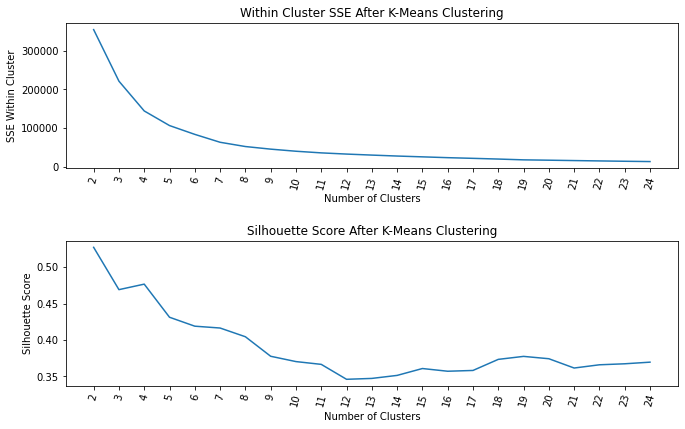

In [12]:
col1=df['Age']
col2=df['Cholesterol']
best_cols=[col1.name,col2.name]
best_vals = df[best_cols].iloc[ :, [0,1]].values
sse_and_silhouette_score(best_cols,best_vals)

clustering performance
-----------------------------------
silhouette score: 0.43
sse with in cluster: 106350.0
Number of points in clusters:
 0    106
4     74
3     69
1     48
2      5
Name: cluster, dtype: int64


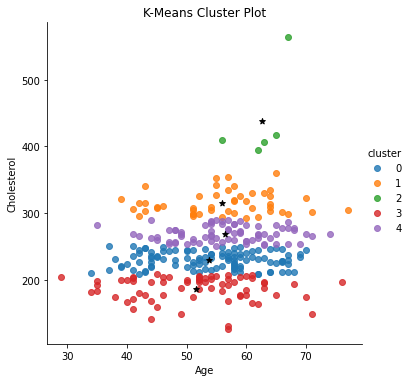

In [13]:
col1=df['Age']
col2=df['Cholesterol']
first_trial = apply_cluster(col1,col2,df,5)


In [14]:
# creating a dataframe that only consists of cluster `0`
cluster_sub_borderline = first_trial.query("cluster == 0").reset_index(drop=True)
cluster_sub_borderline

,Age,Sex,ChestPain,Resting_BP,Cholesterol,FBS,Rest_ECG,Max_HB,Exer_Angina,ST_Depresn,Slope,CA,Thal,Heart_Disease,cluster
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1,0
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1,0
2,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1,0
3,54,1,0,140,239,0,1,160,0,1.2,2,0,2,1,0
4,64,1,3,110,211,0,0,144,1,1.8,1,0,2,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101,57,1,1,154,232,0,0,164,0,0.0,2,1,2,0,0
102,58,0,0,170,225,1,0,146,1,2.8,1,2,1,0,0
103,67,1,2,152,212,0,0,150,0,0.8,1,0,3,0,0
104,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0,0



silhouette score for first iteration: 0.43

sse with in cluster for first iteration: 106350.0

## Second Iteration of Age and Cholesterol where cluster == 0 (Border Line)

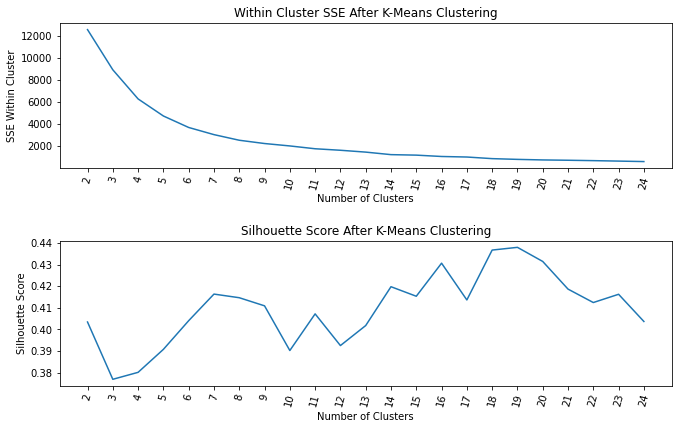

In [15]:
col1=cluster_sub_borderline['Age']
col2=cluster_sub_borderline['Cholesterol']
best_cols=[col1.name,col2.name]
best_vals = cluster_sub_borderline[best_cols].iloc[ :, [0,1]].values
sse_and_silhouette_score(best_cols,best_vals)

clustering performance
-----------------------------------
silhouette score: 0.38
sse with in cluster: 8954.0
Number of points in clusters:
 2    41
1    41
0    24
Name: cluster, dtype: int64


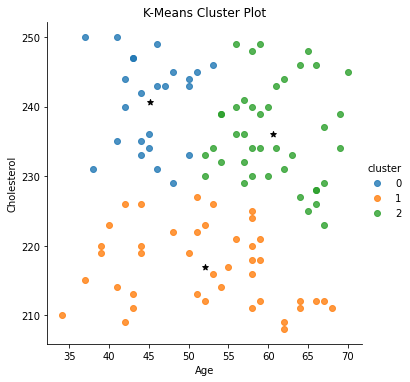

In [16]:
col1=cluster_sub_borderline['Age']
col2=cluster_sub_borderline['Cholesterol']
second_trial = apply_cluster(col1,col2,cluster_sub_borderline,3)

**Domain Info**: 
From https://www.ncbi.nlm.nih.gov/pmc/articles/PMC6503480/ It is clear that people with Cholesterol level ranging from 200-240 is considered to be in border line

**Insight**:
1. So here, the golden cluster would be cluster == 1, as it is in the border line that is Cholesterol level from 200-240 
2. The age range is from 35-70

silhouette score for second Iteration: 0.38

sse with in cluster for second Iteration: 8954.0

## Second Iteration of Age and Cholesterol where cluster != 0 and 3 (HighRisk)

In [17]:
# creating a dataframe that only consists of cluster `0`
cluster_sub_highrisk = first_trial.query("cluster != 0 & cluster != 3").reset_index(drop=True)
cluster_sub_highrisk

,Age,Sex,ChestPain,Resting_BP,Cholesterol,FBS,Rest_ECG,Max_HB,Exer_Angina,ST_Depresn,Slope,CA,Thal,Heart_Disease,cluster
0,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1,1
1,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1,1
2,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1,4
3,48,0,2,130,275,0,1,139,0,0.2,2,0,2,1,4
4,49,1,1,130,266,0,1,171,0,0.6,2,0,2,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122,42,1,0,136,315,0,1,125,1,1.8,1,0,1,0,1
123,46,1,0,140,311,0,1,120,1,1.8,1,2,3,0,1
124,57,1,0,110,335,0,1,143,1,3.0,1,1,3,0,1
125,58,1,0,114,318,0,2,140,0,4.4,0,3,1,0,1


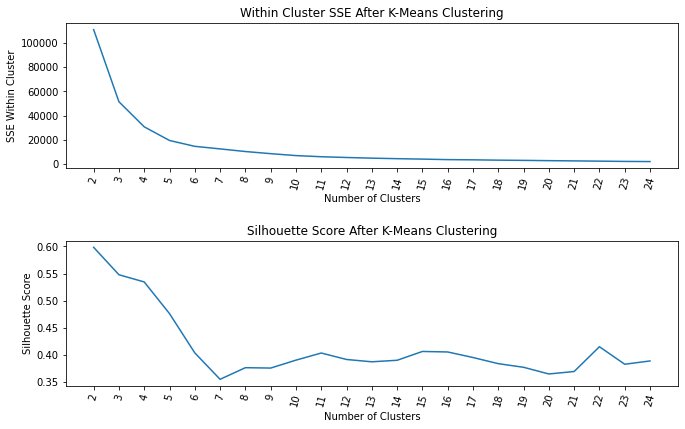

In [18]:
col1=cluster_sub_highrisk['Age']
col2=cluster_sub_highrisk['Cholesterol']
best_cols=[col1.name,col2.name]
best_vals = cluster_sub_highrisk[best_cols].iloc[ :, [0,1]].values
sse_and_silhouette_score(best_cols,best_vals)

clustering performance
-----------------------------------
silhouette score: 0.55
sse with in cluster: 51457.0
Number of points in clusters:
 2    74
0    48
1     5
Name: cluster, dtype: int64


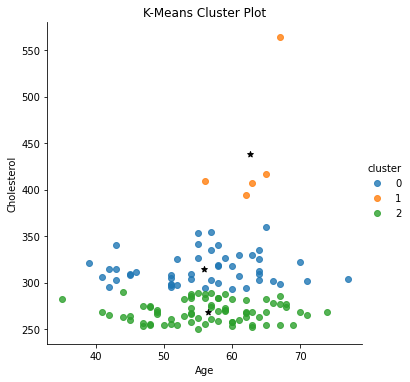

In [19]:
col1=cluster_sub_highrisk['Age']
col2=cluster_sub_highrisk['Cholesterol']
third_trial = apply_cluster(col1,col2,cluster_sub_highrisk,3)

**Domain Info**: 
From https://www.ncbi.nlm.nih.gov/pmc/articles/PMC6503480/ It is clear that people with Cholesterol level above 240 is considered to be in high risk for Heart Disease.

**Insight**:
1. These 3 clusters from the above graph comes under high risk for heart disease and are thus the golden clusters all together.
2. The age for cholesterol high risk is mostly between 40-70 

silhouette score for second iteration: 0.55

sse with in cluster for second iteration: 51457.0

## First Iteration of Age and Resting BP

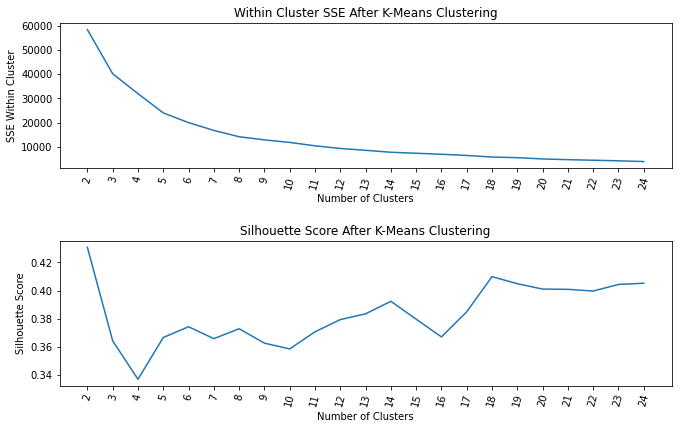

In [20]:
col1=df['Age']
col2=df['Resting_BP']
best_cols=[col1.name,col2.name]
best_vals = df[best_cols].iloc[ :, [0,1]].values
sse_and_silhouette_score(best_cols,best_vals)

clustering performance
-----------------------------------
silhouette score: 0.37
sse with in cluster: 16825.0
Number of points in clusters:
 4    76
3    54
0    52
1    45
5    36
6    26
2    13
Name: cluster, dtype: int64


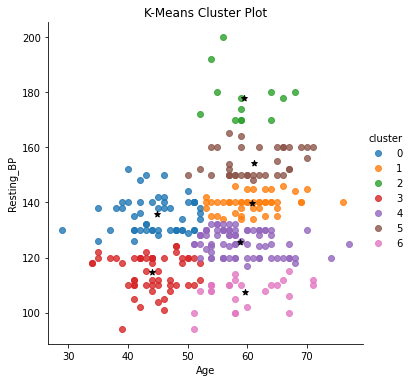

In [21]:
col1=df['Age']
col2=df['Resting_BP']
first_trial = apply_cluster(col1,col2,df,7)

silhouette score for first Iteration: 0.37

sse with in cluster for first Iteration: 16825.0

## Second Iteration for Age and BP where cluster != 6 and 3 (Risk)

In [22]:
# creating a dataframe that only consists of cluster `0`
cluster_sub_bp_risk = first_trial.query("cluster != 6 & cluster != 3").reset_index(drop=True)
cluster_sub_bp_risk

,Age,Sex,ChestPain,Resting_BP,Cholesterol,FBS,Rest_ECG,Max_HB,Exer_Angina,ST_Depresn,Slope,CA,Thal,Heart_Disease,cluster
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1,0
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1,0
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1,4
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
217,59,1,0,164,176,1,0,90,0,1.0,1,2,1,0,5
218,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0,1
219,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0,1
220,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0,4


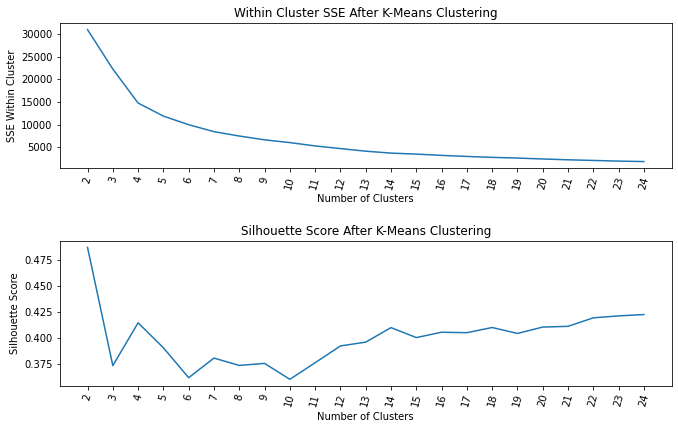

In [23]:
col1=cluster_sub_bp_risk['Age']
col2=cluster_sub_bp_risk['Resting_BP']
best_cols=[col1.name,col2.name]
best_vals = cluster_sub_bp_risk[best_cols].iloc[ :, [0,1]].values
sse_and_silhouette_score(best_cols,best_vals)

clustering performance
-----------------------------------
silhouette score: 0.41
sse with in cluster: 14741.0
Number of points in clusters:
 0    81
3    60
2    55
1    26
Name: cluster, dtype: int64


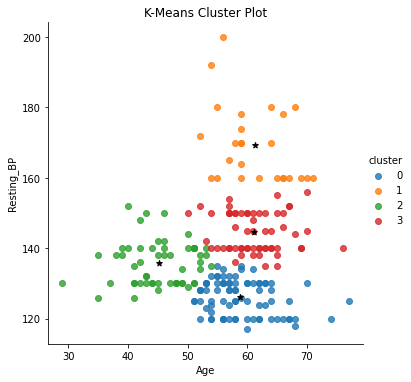

In [24]:
col1=cluster_sub_bp_risk['Age']
col2=cluster_sub_bp_risk['Resting_BP']
second_trial = apply_cluster(col1,col2,cluster_sub_bp_risk,4)

silhouette score for second Iteration: 0.41

sse with in cluster for second Iteration: 14741.0

## Third Iteration for Age and BP where cluster == 1 from the second iteration (Higher Risk)

In [25]:
# creating a dataframe that only consists of cluster `0`
cluster_sub_bp_highrisk = second_trial.query("cluster == 1").reset_index(drop=True)
cluster_sub_bp_highrisk

,Age,Sex,ChestPain,Resting_BP,Cholesterol,FBS,Rest_ECG,Max_HB,Exer_Angina,ST_Depresn,Slope,CA,Thal,Heart_Disease,cluster
0,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1,1
1,71,0,1,160,302,0,1,162,0,0.4,2,2,2,1,1
2,65,0,2,160,360,0,0,151,0,0.8,2,0,2,1,1
3,59,1,3,178,270,0,0,145,0,4.2,0,0,3,1,1
4,69,1,3,160,234,1,0,131,0,0.1,1,1,2,1,1
5,64,0,0,180,325,0,1,154,1,0.0,2,0,2,1,1
6,54,0,2,160,201,0,1,163,0,0.0,2,1,2,1,1
7,66,1,0,160,228,0,0,138,0,2.3,2,0,1,1,1
8,64,1,3,170,227,0,0,155,0,0.6,1,0,3,1,1
9,67,1,0,160,286,0,0,108,1,1.5,1,3,2,0,1


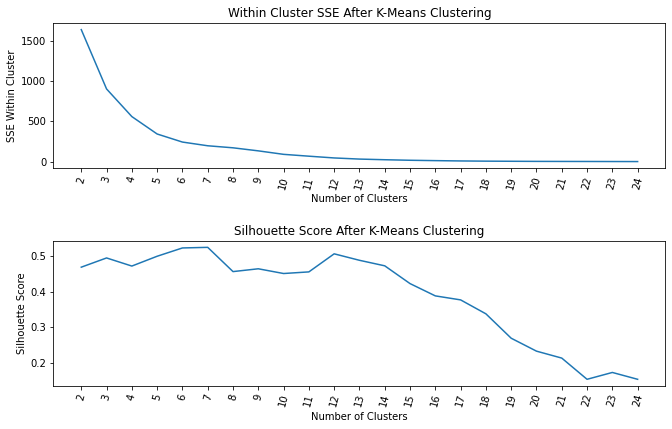

In [26]:
col1=cluster_sub_bp_highrisk['Age']
col2=cluster_sub_bp_highrisk['Resting_BP']
best_cols=[col1.name,col2.name]
best_vals = cluster_sub_bp_highrisk[best_cols].iloc[ :, [0,1]].values
sse_and_silhouette_score(best_cols,best_vals)

clustering performance
-----------------------------------
silhouette score: 0.52
sse with in cluster: 242.0
Number of points in clusters:
 4    7
1    6
3    5
5    3
0    3
2    2
Name: cluster, dtype: int64


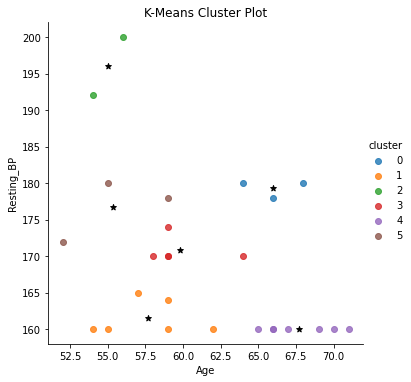

In [27]:
col1=cluster_sub_bp_highrisk['Age']
col2=cluster_sub_bp_highrisk['Resting_BP']
third_trial = apply_cluster(col1,col2,cluster_sub_bp_highrisk,6)

**Domain Info**: From https://www.medicalnewstoday.com/articles/325861#Which-number-is-more-important? It is clear that people with 180/120 mmHg is considered the highest BP which can result in Heart Disease like Cardiac Arrest.

**Insight**:
1. Here, after 3 iterations of "Resting_BP" we get the cluster 2 as the golden cluster which indicates the higher BP reading which results in Cardiac arrest that is Heart disease.
2. Age group is from 50-55

silhouette score for third iteration: 0.52

sse with in cluster for third iteration: 242.0

## Third Iteration for Age and BP where cluster != 1 (Border Line)

In [28]:
# creating a dataframe that only consists of cluster `0`
cluster_sub_bp_borderline = second_trial.query("cluster != 1").reset_index(drop=True)
cluster_sub_bp_borderline

,Age,Sex,ChestPain,Resting_BP,Cholesterol,FBS,Rest_ECG,Max_HB,Exer_Angina,ST_Depresn,Slope,CA,Thal,Heart_Disease,cluster
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1,3
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1,0
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
191,63,0,0,124,197,0,1,136,1,0.0,1,0,2,0,0
192,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0,3
193,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0,3
194,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0,0


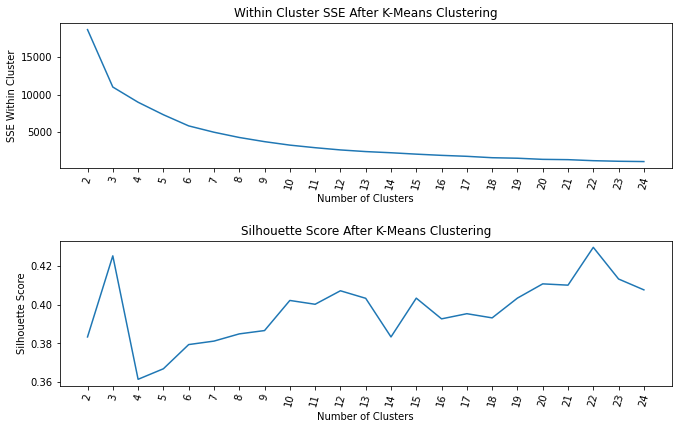

In [29]:
col1=cluster_sub_bp_borderline['Age']
col2=cluster_sub_bp_borderline['Resting_BP']
best_cols=[col1.name,col2.name]
best_vals = cluster_sub_bp_borderline[best_cols].iloc[ :, [0,1]].values
sse_and_silhouette_score(best_cols,best_vals)

clustering performance
-----------------------------------
silhouette score: 0.38
sse with in cluster: 18631.0
Number of points in clusters:
 1    109
0     87
Name: cluster, dtype: int64


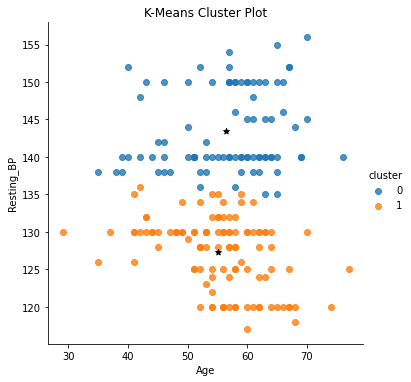

In [30]:
col1=cluster_sub_bp_borderline['Age']
col2=cluster_sub_bp_borderline['Resting_BP']
third_trial = apply_cluster(col1,col2,cluster_sub_bp_borderline,2)

**Domain Info**: 
From https://www.medicalnewstoday.com/articles/325861#Which-number-is-more-important? It is clear that people with 120/150 mmHg is considered to be in border line which can result in Heart Disease like Cardiac Arrest.

**Insight**:
1. After third Iteration, considering all the other clusters other than cluster 1, the golden cluster for border line BP patients is cluster 0 as seen in the above graph.
2. The age group is from 40-70

silhouette score for third iteration: 0.38

sse with in cluster for third iteration: 18631.0

## First Iteration for Age and Max Heart Beat

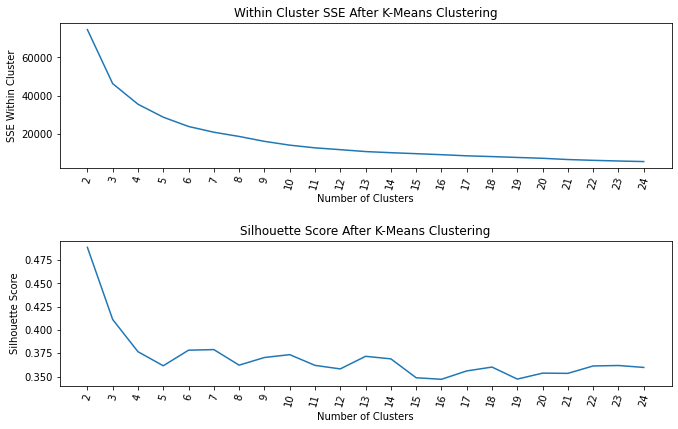

In [31]:
col1=df['Age']
col2=df['Max_HB']
best_cols=[col1.name,col2.name]
best_vals = df[best_cols].iloc[ :, [0,1]].values
sse_and_silhouette_score(best_cols,best_vals)

clustering performance
-----------------------------------
silhouette score: 0.38
sse with in cluster: 35493.0
Number of points in clusters:
 1    106
2     86
0     57
3     53
Name: cluster, dtype: int64


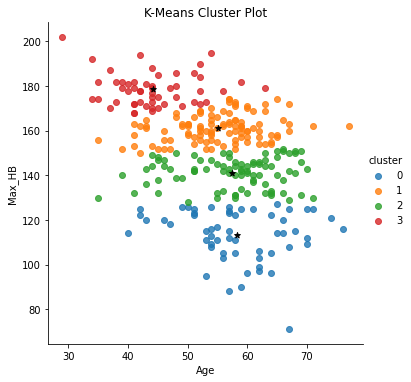

In [32]:
col1=df['Age']
col2=df['Max_HB']
first_trial = apply_cluster(col1,col2,df,4)

silhouette score for first iteration: 0.38

sse with in cluster for first iteration: 35493.0

## Second Iteration for Age and Heart Beat where cluster == 0 (Risk)

In [33]:
# creating a dataframe that only consists of cluster `0`
cluster_sub_heartbeat_low = first_trial.query("cluster ==0").reset_index(drop=True)
cluster_sub_heartbeat_low

,Age,Sex,ChestPain,Resting_BP,Cholesterol,FBS,Rest_ECG,Max_HB,Exer_Angina,ST_Depresn,Slope,CA,Thal,Heart_Disease,cluster
0,66,0,3,150,226,0,1,114,0,2.6,0,0,2,1,0
1,51,1,2,110,175,0,1,123,0,0.6,2,0,2,1,0
2,51,1,3,125,213,0,0,125,1,1.4,2,1,2,1,0
3,53,0,2,128,216,0,0,115,0,0.0,2,0,0,1,0
4,42,0,0,102,265,0,0,122,0,0.6,1,0,2,1,0
5,58,0,0,100,248,0,0,122,0,1.0,1,0,2,1,0
6,53,1,0,142,226,0,0,111,1,0.0,2,0,3,1,0
7,68,0,2,120,211,0,0,115,0,1.5,1,0,2,1,0
8,64,0,0,130,303,0,1,122,0,2.0,1,2,2,1,0
9,74,0,1,120,269,0,0,121,1,0.2,2,1,2,1,0


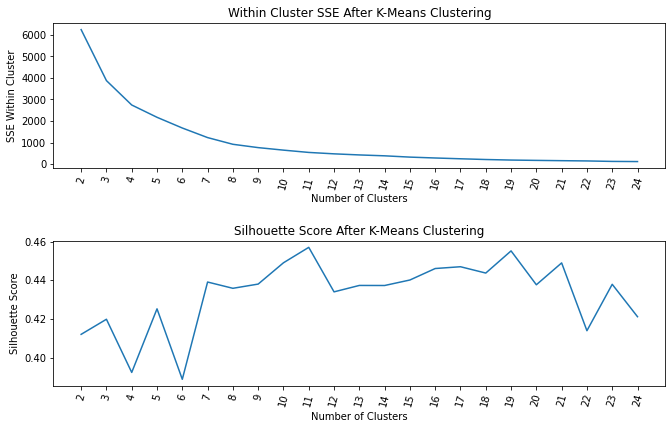

In [34]:
col1=cluster_sub_heartbeat_low['Age']
col2=cluster_sub_heartbeat_low['Max_HB']
best_cols=[col1.name,col2.name]
best_vals = cluster_sub_heartbeat_low[best_cols].iloc[ :, [0,1]].values
sse_and_silhouette_score(best_cols,best_vals)

clustering performance
-----------------------------------
silhouette score: 0.39
sse with in cluster: 2744.0
Number of points in clusters:
 0    20
3    15
2    14
1     8
Name: cluster, dtype: int64


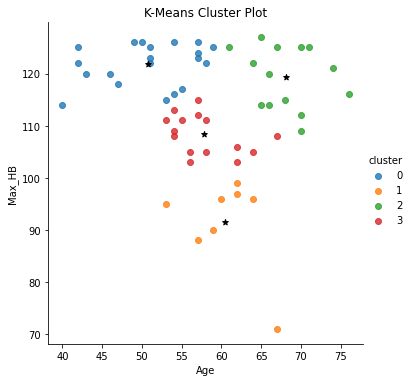

In [35]:
col1=cluster_sub_heartbeat_low['Age']
col2=cluster_sub_heartbeat_low['Max_HB']
second_trial = apply_cluster(col1,col2,cluster_sub_heartbeat_low,4)

**Domain Info:** From https://my.clevelandclinic.org/health/diagnostics/17402-pulse--heart-rate It says that a normal heart rate is:
220 - your age = predicted maximum heart rate
Example: a 40-year-old's predicted maximum heart rate is 180 beats/minute.

**Insight**:
1. Thus, from the above graph we get an insight that people with age 45-70 are having a relatvively very low range of heart beat which is considered abnormal and can lead to heart disease eventually.
All the clusters after the second iteration of Age and Max_HB shows that it belongs to the lower heart beat rate. So these fall under Heart disease category
2. We can also observe that the age is between 45-70. Thus, these clusters gives a clear vision of people suffering from heart disease with low heart beat between age 45-70

silhouette score for second Iteration: 0.39

sse with in cluster for second Iteration: 2744.0